In [2]:
from __future__ import print_function
import keras
from keras.models import Model
from keras.layers import Input,Dense,TimeDistributed,LSTM

In [3]:
import pandas as pd
import numpy as np
df=pd.read_csv("NetflixStocks.csv")

In [4]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,5/23/2002,1.156429,1.242857,1.145714,1.196429,1.196429,104790000
1,5/24/2002,1.214286,1.225000,1.197143,1.210000,1.210000,11104800
2,5/28/2002,1.213571,1.232143,1.157143,1.157143,1.157143,6609400
3,5/29/2002,1.164286,1.164286,1.085714,1.103571,1.103571,6757800
4,5/30/2002,1.107857,1.107857,1.071429,1.071429,1.071429,10154200


In [5]:
df['Date'] = pd.to_datetime(df['Date'])
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df['Quarter'] = df['Date'].dt.quarter
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Day,Month,Year,Quarter
0,2002-05-23,1.156429,1.242857,1.145714,1.196429,1.196429,104790000,23,5,2002,2
1,2002-05-24,1.214286,1.225000,1.197143,1.210000,1.210000,11104800,24,5,2002,2
2,2002-05-28,1.213571,1.232143,1.157143,1.157143,1.157143,6609400,28,5,2002,2
3,2002-05-29,1.164286,1.164286,1.085714,1.103571,1.103571,6757800,29,5,2002,2
4,2002-05-30,1.107857,1.107857,1.071429,1.071429,1.071429,10154200,30,5,2002,2


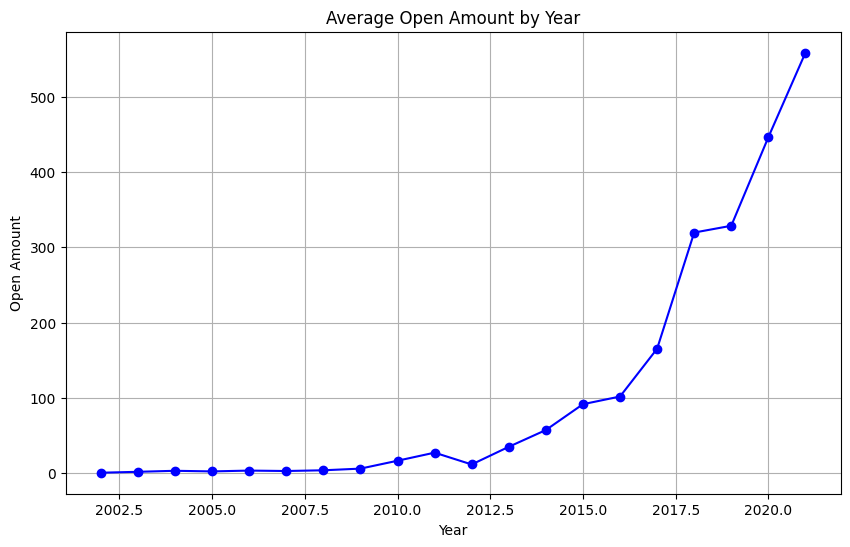

In [6]:
import matplotlib.pyplot as plt
yearly_open = df.groupby('Year')['Open'].mean()
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
yearly_open.plot(kind='line', marker='o', color='blue')
plt.title('Average Open Amount by Year')
plt.xlabel('Year')
plt.ylabel('Open Amount')
plt.grid(True)
plt.show()

In [7]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Day',
       'Month', 'Year', 'Quarter'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4937 entries, 0 to 4936
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       4937 non-null   datetime64[ns]
 1   Open       4937 non-null   float64       
 2   High       4937 non-null   float64       
 3   Low        4937 non-null   float64       
 4   Close      4937 non-null   float64       
 5   Adj Close  4937 non-null   float64       
 6   Volume     4937 non-null   int64         
 7   Day        4937 non-null   int64         
 8   Month      4937 non-null   int64         
 9   Year       4937 non-null   int64         
 10  Quarter    4937 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(5)
memory usage: 424.4 KB


In [9]:
df['Previous Close'] = df['Close'].shift(1)
df['Price Volatility'] = df['High'] - df['Low']
df['30-Day Moving Average'] = df['Close'].rolling(window=30).mean()
df['180-Day Moving Average'] = df['Close'].rolling(window=180).mean()

In [10]:
def calculate_rsi(data, period=14):
    delta = data.diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    avg_gain = gain.rolling(window=period).mean()
    avg_loss = loss.rolling(window=period).mean()
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

In [11]:
df['RSI'] = calculate_rsi(df['Close'], period=14)

In [12]:
df=df.fillna(0)

In [13]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Day,Month,Year,Quarter,Previous Close,Price Volatility,30-Day Moving Average,180-Day Moving Average,RSI
0,2002-05-23,1.156429,1.242857,1.145714,1.196429,1.196429,104790000,23,5,2002,2,0.000000,0.097143,0.0,0.0,0.0
1,2002-05-24,1.214286,1.225000,1.197143,1.210000,1.210000,11104800,24,5,2002,2,1.196429,0.027857,0.0,0.0,0.0
2,2002-05-28,1.213571,1.232143,1.157143,1.157143,1.157143,6609400,28,5,2002,2,1.210000,0.075000,0.0,0.0,0.0
3,2002-05-29,1.164286,1.164286,1.085714,1.103571,1.103571,6757800,29,5,2002,2,1.157143,0.078572,0.0,0.0,0.0
4,2002-05-30,1.107857,1.107857,1.071429,1.071429,1.071429,10154200,30,5,2002,2,1.103571,0.036428,0.0,0.0,0.0


In [14]:
df.corr()

C:\Users\KIIT\AppData\Local\Temp\ipykernel_13892\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Open,High,Low,Close,Adj Close,Volume,Day,Month,Year,Quarter,Previous Close,Price Volatility,30-Day Moving Average,180-Day Moving Average,RSI
Open,1.000000,0.999871,0.999866,0.999718,0.999718,-0.259661,0.000331,0.030663,0.809841,0.030846,0.999865,0.843286,0.997416,0.987774,0.032457
High,0.999871,1.000000,0.999830,0.999872,0.999872,-0.258408,0.000161,0.030360,0.810137,0.030604,0.999759,0.848115,0.997422,0.987765,0.033122
Low,0.999866,0.999830,1.000000,0.999870,0.999870,-0.260859,0.000430,0.030607,0.809697,0.030742,0.999737,0.838197,0.997299,0.987860,0.034410
Close,0.999718,0.999872,0.999870,1.000000,1.000000,-0.259535,0.000109,0.030301,0.810012,0.030538,0.999587,0.843185,0.997267,0.987744,0.034926
Adj Close,0.999718,0.999872,0.999870,1.000000,1.000000,-0.259535,0.000109,0.030301,0.810012,0.030538,0.999587,0.843185,0.997267,0.987744,0.034926
Volume,-0.259661,-0.258408,-0.260859,-0.259535,-0.259535,1.000000,0.029843,-0.052029,-0.102428,-0.022313,-0.259648,-0.147486,-0.259215,-0.256113,-0.018400
Day,0.000331,0.000161,0.000430,0.000109,0.000109,0.029843,1.000000,-0.003164,-0.003861,0.001897,0.000247,-0.007588,0.001574,0.002542,-0.013355
Month,0.030663,0.030360,0.030607,0.030301,0.030301,-0.052029,-0.003164,1.000000,-0.036828,0.970788,0.030920,0.018515,0.039941,0.046542,-0.073198
Year,0.809841,0.810137,0.809697,0.810012,0.810012,-0.102428,-0.003861,-0.036828,1.000000,-0.035609,0.809868,0.695753,0.809266,0.807425,0.049906
Quarter,0.030846,0.030604,0.030742,0.030538,0.030538,-0.022313,0.001897,0.970788,-0.035609,1.000000,0.031091,0.021851,0.038882,0.045625,-0.063672


In [15]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Day',
       'Month', 'Year', 'Quarter', 'Previous Close', 'Price Volatility',
       '30-Day Moving Average', '180-Day Moving Average', 'RSI'],
      dtype='object')

In [16]:
from sklearn.model_selection import train_test_split
X=df[['Volume', 'Year', 'Price Volatility','180-Day Moving Average']]
y=df['Open']

In [17]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled = sc.fit_transform(X)
y_scaled = sc.fit_transform(y.values.reshape(-1, 1))

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.25, random_state=42)

In [19]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)

In [20]:
import xgboost as xgb
xgb_model = xgb.XGBRegressor()
xgb_model.fit(X_train, y_train)
xgb_predictions = xgb_model.predict(X_test)

In [21]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

C:\Users\KIIT\AppData\Local\Temp\ipykernel_13892\1724067540.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X_train, y_train)


In [22]:
from sklearn.ensemble import AdaBoostRegressor
adaboost_model = AdaBoostRegressor()
adaboost_model.fit(X_train, y_train)
adaboost_predictions = adaboost_model.predict(X_test)

c:\Users\KIIT\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [23]:
from sklearn.svm import SVR
svm_model = SVR()
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)

c:\Users\KIIT\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [24]:
from sklearn.metrics import r2_score, mean_squared_error
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

metrics = {
    'Model': [],
    'R2 Score': [],
    'MSE': [],
    'RMSE': []
}

models = ['Linear Regression', 'XGBoost', 'Random Forest', 'Logistic Regression', 'AdaBoost', 'SVM']
predictions = [lr_predictions, xgb_predictions, rf_predictions, adaboost_predictions, svm_predictions]

for model, y_pred in zip(models, predictions):
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    root_mse = rmse(y_test, y_pred)

    metrics['Model'].append(model)
    metrics['R2 Score'].append(r2)
    metrics['MSE'].append(mse)
    metrics['RMSE'].append(root_mse)

met = pd.DataFrame(metrics)

In [25]:
met

,Model,R2 Score,MSE,RMSE
0,Linear Regression,0.978013,0.022841,0.151133
1,XGBoost,0.996240,0.003906,0.062497
2,Random Forest,0.996820,0.003303,0.057474
3,Logistic Regression,0.987816,0.012657,0.112505
4,AdaBoost,0.982150,0.018543,0.136174


In [26]:
#here we can see that it is an overfit model, we can improve it using traditional ML algos, hyper paramter tunning etc
#but will try with RNN LSTM and time series analysis

In [27]:
df=pd.read_csv("NetflixStocks.csv")

In [28]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,5/23/2002,1.156429,1.242857,1.145714,1.196429,1.196429,104790000
1,5/24/2002,1.214286,1.225000,1.197143,1.210000,1.210000,11104800
2,5/28/2002,1.213571,1.232143,1.157143,1.157143,1.157143,6609400
3,5/29/2002,1.164286,1.164286,1.085714,1.103571,1.103571,6757800
4,5/30/2002,1.107857,1.107857,1.071429,1.071429,1.071429,10154200


In [29]:
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .75 ))

training_data_len

3703

In [30]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00119131],
       [0.00121094],
       [0.00113448],
       ...,
       [0.88286132],
       [0.88261535],
       [0.88485751]])

In [31]:
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

[array([0.00119131, 0.00121094, 0.00113448, 0.00105699, 0.00101049,
       0.00101773, 0.00109315, 0.00107765, 0.00112002, 0.00117064,
       0.00107869, 0.00113345, 0.00112931, 0.00104149, 0.00102703,
       0.00088754, 0.00079455, 0.00077802, 0.00083691, 0.00084518,
       0.00087721, 0.00087617, 0.00085551, 0.00089064, 0.00082555,
       0.00090614, 0.00094747, 0.00115721, 0.00121714, 0.00130703,
       0.00116134, 0.00113965, 0.00114378, 0.0012967 , 0.00120784,
       0.00111382, 0.00109005, 0.00103632, 0.00112312, 0.00113861,
       0.00115411, 0.00111898, 0.00107249, 0.00095987, 0.00072119,
       0.00072842, 0.00078318, 0.00084001, 0.00075012, 0.00058584,
       0.00058171, 0.00056104, 0.00060857, 0.0006127 , 0.00059927,
       0.00055588, 0.00057861, 0.00066643, 0.00073772, 0.00078112])]
[0.0008813407918589954]

[array([0.00119131, 0.00121094, 0.00113448, 0.00105699, 0.00101049,
       0.00101773, 0.00109315, 0.00107765, 0.00112002, 0.00117064,
       0.00107869, 0.00113345, 0.

In [32]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=128, epochs=100)

Epoch 1/100
29/29 [==============================] - 16s 251ms/step - loss: 5.9161e-04
Epoch 2/100
29/29 [==============================] - 7s 258ms/step - loss: 2.9929e-05
Epoch 3/100
29/29 [==============================] - 7s 238ms/step - loss: 1.5897e-05
Epoch 4/100
29/29 [==============================] - 7s 253ms/step - loss: 1.6071e-05
Epoch 5/100
29/29 [==============================] - 8s 281ms/step - loss: 1.5117e-05
Epoch 6/100
29/29 [==============================] - 7s 243ms/step - loss: 1.5432e-05
Epoch 7/100
29/29 [==============================] - 7s 255ms/step - loss: 1.4624e-05
Epoch 8/100
29/29 [==============================] - 8s 281ms/step - loss: 1.5302e-05
Epoch 9/100
29/29 [==============================] - 8s 263ms/step - loss: 1.4987e-05
Epoch 10/100
29/29 [==============================] - 8s 283ms/step - loss: 1.4958e-05
Epoch 11/100
29/29 [==============================] - 8s 269ms/step - loss: 1.3170e-05
Epoch 12/100
29/29 [==============================]

In [33]:
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

39/39 [==============================] - 4s 61ms/step


9.69940083355601

C:\Users\KIIT\AppData\Local\Temp\ipykernel_13892\3344400724.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


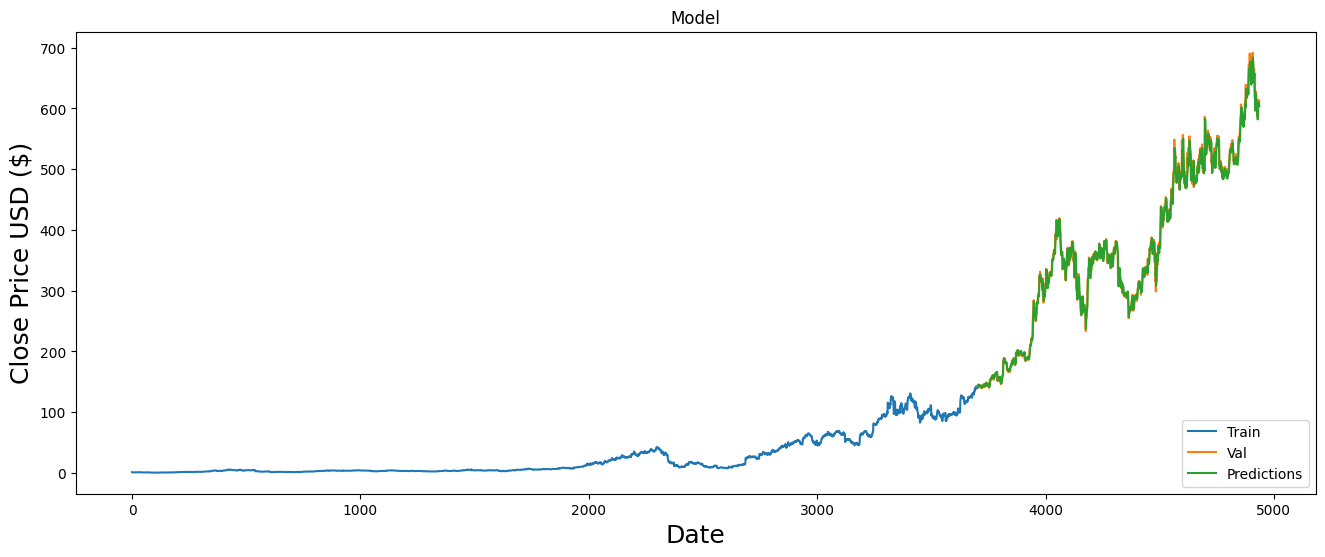

In [34]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [35]:
valid

,Close,Predictions
3703,144.000000,141.328247
3704,144.740005,143.794861
3705,144.139999,145.393585
3706,144.820007,145.388992
3707,143.199997,145.535538
...,...,...
4932,614.090027,607.720337
4933,613.119995,610.728516
4934,610.710022,609.269348
4935,610.539978,605.756714


In [36]:
import pickle
pickle.dump(model,open('./model.sav','wb'))